In [117]:
import pandas as pd
data = pd.read_csv('sensor_data_with_noise (1).csv')


In [92]:
rows_with_missing_values = data[data.isnull().any(axis=1)]
print(rows_with_missing_values)

               Timestamp  Temperature (°C)  irrelevant_feature  \
0    2025-05-28 10:48:00         29.818874                 NaN   
1    2025-05-28 10:19:00         23.923429                 NaN   
4    2025-05-28 11:30:00         25.625575                 NaN   
5    2025-05-28 11:31:00         24.027716                 NaN   
6    2025-05-28 10:29:00         24.948905                 NaN   
..                   ...               ...                 ...   
190  2025-05-28 10:55:00         30.916984                 NaN   
191  2025-05-28 11:15:00         25.131135                 NaN   
195  2025-05-28 11:37:00         24.781702                 NaN   
197  2025-05-28 10:24:00         26.005388                 NaN   
199  2025-05-28 11:34:00         25.194875                 NaN   

     Derived_Feature_1  
0                  NaN  
1                  NaN  
4                  NaN  
5                  NaN  
6                  NaN  
..                 ...  
190                NaN  
191    

In [118]:
print(data.isnull().sum())

Timestamp           0
Temperature (°C)    0
Humidity (%)        0
Sensor Drift        0
dtype: int64


In [119]:
data.fillna(method='ffill', inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_13736\1984096990.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [120]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Timestamp, Temperature (°C), Humidity (%), Sensor Drift]
Index: []


In [121]:
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

0


In [122]:
import pandas as pd
import numpy as np

# Generate timestamps
timestamps = pd.date_range(start='2025-05-28 10:00:00', periods=100, freq='T')

# Generate temperature with noise
base_temp = 25
noise = np.random.normal(loc=0.0, scale=0.5, size=100)
spikes = np.random.choice([0, 5, -5], size=100, p=[0.9, 0.05, 0.05])
temperature = base_temp + noise + spikes

# Create DataFrame
df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature (°C)': temperature
})

import numpy as np

# Select only the Temperature column
temperature_data = df['Temperature (°C)']

# Calculate IQR
Q1 = temperature_data.quantile(0.25)
Q3 = temperature_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (temperature_data < (Q1 - 1.5 * IQR)) | (temperature_data > (Q3 + 1.5 * IQR))

# Remove outliers from the DataFrame
df_cleaned = df[~outliers]


C:\Users\HP\AppData\Local\Temp\ipykernel_13736\3376148675.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start='2025-05-28 10:00:00', periods=100, freq='T')


In [123]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the temperature column
temperature_scaled = scaler.fit_transform(df[['Temperature (°C)']])

# Create a new DataFrame with scaled temperature
df_scaled = pd.DataFrame({
    'Timestamp': df['Timestamp'],
    'Temperature (°C) - Scaled': temperature_scaled.flatten()
})

# Optional: print first 5 rows
print(df_scaled.head())



            Timestamp  Temperature (°C) - Scaled
0 2025-05-28 10:00:00                   0.111390
1 2025-05-28 10:01:00                   0.069279
2 2025-05-28 10:02:00                  -0.186646
3 2025-05-28 10:03:00                  -0.146198
4 2025-05-28 10:04:00                  -0.531979


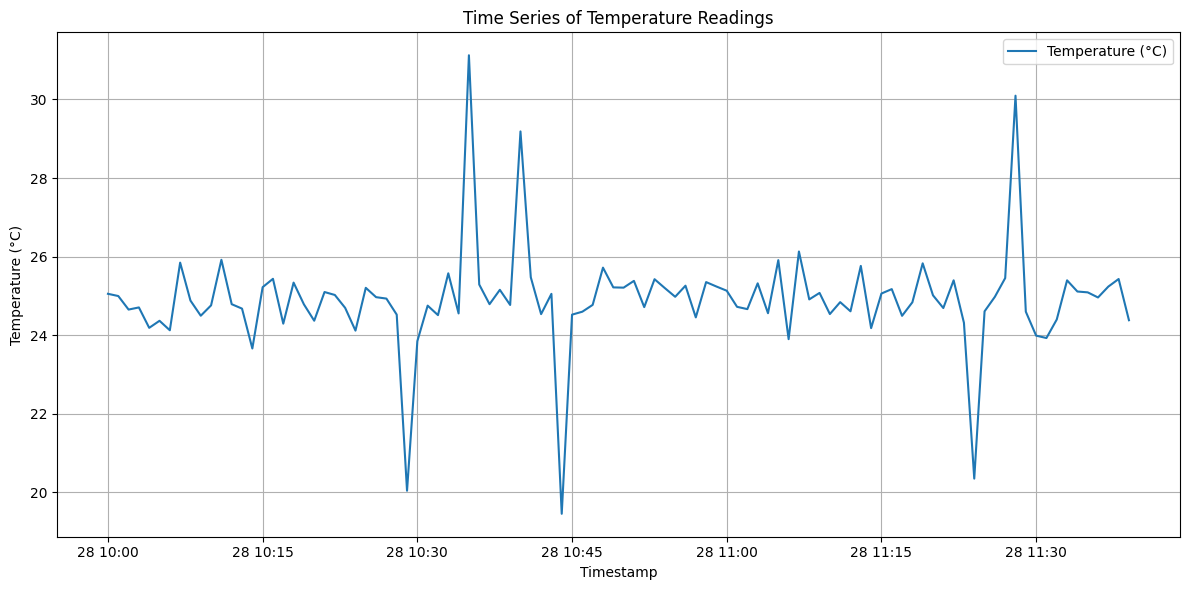

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature (°C)', color='tab:blue')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Temperature Readings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


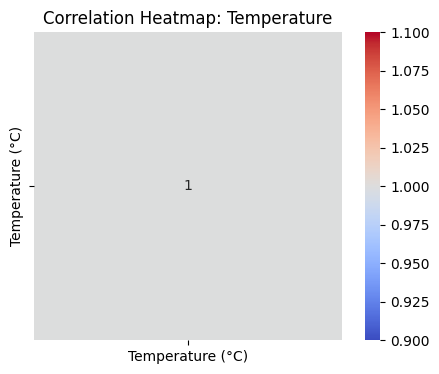

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are used
correlation_matrix = df[['Temperature (°C)']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap: Temperature")
plt.show()



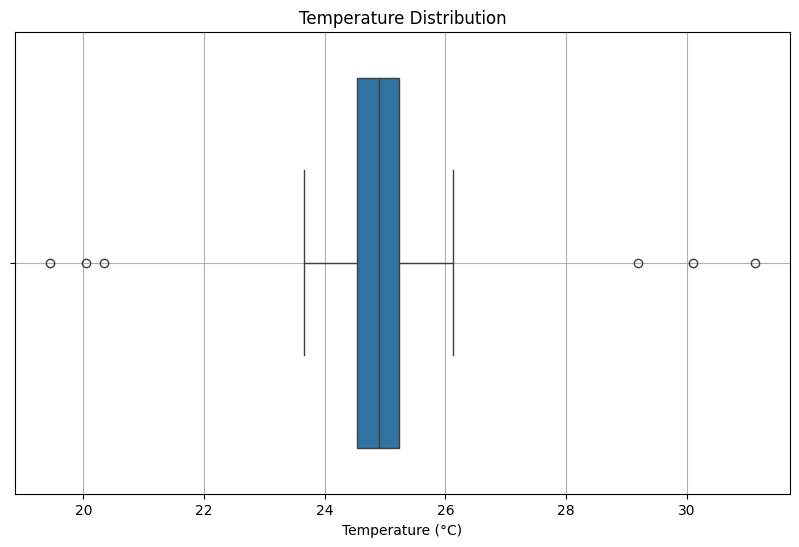

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Temperature (°C)'])
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.grid(True)
plt.show()



In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Timestamp'], y=df['Temperature (°C)'])
plt.title("Scatterplot of Temperature over Time")
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [128]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the Temperature data
scaler = StandardScaler()
temperature_scaled = scaler.fit_transform(df[['Temperature (°C)']])

# Fit Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(temperature_scaled)

# Predict anomalies (-1 indicates anomaly)
df['anomaly'] = model.predict(temperature_scaled)

# Extract anomalies
anomalies = df[df['anomaly'] == -1]

# Plot temperature and anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature (°C)')
plt.scatter(anomalies['Timestamp'], anomalies['Temperature (°C)'], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Anomalies in Temperature Readings')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print(anomalies.head())


             Timestamp  Temperature (°C)  anomaly
14 2025-05-28 10:14:00         23.656976       -1
29 2025-05-28 10:29:00         20.034083       -1
30 2025-05-28 10:30:00         23.844083       -1
35 2025-05-28 10:35:00         31.126662       -1
40 2025-05-28 10:40:00         29.186698       -1


In [129]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the Temperature column
temperature_scaled = min_max_scaler.fit_transform(df[['Temperature (°C)']])

# Create a new DataFrame with scaled temperature and Timestamp
df_scaled = pd.DataFrame({
    'Timestamp': df['Timestamp'],
    'Temperature (°C) - Scaled': temperature_scaled.flatten()
})

print(df_scaled.head())


            Timestamp  Temperature (°C) - Scaled
0 2025-05-28 10:00:00                   0.479771
1 2025-05-28 10:01:00                   0.474912
2 2025-05-28 10:02:00                   0.445387
3 2025-05-28 10:03:00                   0.450053
4 2025-05-28 10:04:00                   0.405546


In [130]:
import pandas as pd
from sklearn.decomposition import PCA

# Create a lagged temperature column to have 2 features
df['Temp_lag1'] = df['Temperature (°C)'].shift(1).fillna(method='bfill')

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['Temperature (°C)', 'Temp_lag1']])

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Timestamp'] = df['Timestamp']

print(principal_df.head())



        PC1       PC2           Timestamp
0  0.207536 -0.003663 2025-05-28 10:00:00
1  0.167199  0.036250 2025-05-28 10:01:00
2 -0.117853  0.238474 2025-05-28 10:02:00
3 -0.321672 -0.045001 2025-05-28 10:03:00
4 -0.652861  0.359380 2025-05-28 10:04:00


C:\Users\HP\AppData\Local\Temp\ipykernel_13736\4270797068.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temp_lag1'] = df['Temperature (°C)'].shift(1).fillna(method='bfill')


In [131]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Scale the Temperature column
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(df[['Temperature (°C)']])

# Fit Isolation Forest model on scaled temperature
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(temperature_scaled)

# Predict anomalies (-1 indicates anomaly)
df['anomaly'] = model.predict(temperature_scaled)

# Extract anomalies
anomalies = df[df['anomaly'] == -1]

# Plot temperature and anomalies over time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature (°C)')
plt.scatter(anomalies['Timestamp'], anomalies['Temperature (°C)'], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Anomalies in Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print(anomalies.head())


             Timestamp  Temperature (°C)  anomaly  Temp_lag1
14 2025-05-28 10:14:00         23.656976       -1  24.673142
29 2025-05-28 10:29:00         20.034083       -1  24.519869
30 2025-05-28 10:30:00         23.844083       -1  20.034083
35 2025-05-28 10:35:00         31.126662       -1  24.550992
40 2025-05-28 10:40:00         29.186698       -1  24.766286


In [132]:
import pandas as pd

# Select rows without anomalies (anomaly == 1)
data_cleaned_no_anomalies = df[df['anomaly'] == 1].copy()

# Drop the 'anomaly' column
data_cleaned_no_anomalies = data_cleaned_no_anomalies.drop(columns=['anomaly'])

# Save cleaned data to CSV
data_cleaned_no_anomalies.to_csv('temperature_data_cleaned.csv', index=False)




In [133]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Scale the Temperature data
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(df[['Temperature (°C)']])

# Run DBSCAN clustering
dbscan = DBSCAN(eps=0.05, min_samples=5)  # eps adjusted due to 1D scaled data
dbscan.fit(temperature_scaled)

# Assign cluster labels to the dataframe
df['dbscan_anomaly'] = dbscan.labels_

# DBSCAN labels -1 are considered anomalies
dbscan_anomalies = df[df['dbscan_anomaly'] == -1]

print(dbscan_anomalies.head())



             Timestamp  Temperature (°C)  anomaly  Temp_lag1  dbscan_anomaly
29 2025-05-28 10:29:00         20.034083       -1  24.519869              -1
35 2025-05-28 10:35:00         31.126662       -1  24.550992              -1
40 2025-05-28 10:40:00         29.186698       -1  24.766286              -1
44 2025-05-28 10:44:00         19.446674       -1  25.049190              -1
84 2025-05-28 11:24:00         20.342917       -1  24.311344              -1


In [135]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Scale the temperature data
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(df[['Temperature (°C)']])

# Train One-Class SVM model
ocsvm = OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
ocsvm.fit(temperature_scaled)

# Predict anomalies (-1 means anomaly)
df['ocsvm_anomaly'] = ocsvm.predict(temperature_scaled)

# Extract anomalies
ocsvm_anomalies = df[df['ocsvm_anomaly'] == -1]

print(ocsvm_anomalies.head())


             Timestamp  Temperature (°C)  anomaly  Temp_lag1  dbscan_anomaly  \
11 2025-05-28 10:11:00         25.916524        1  24.756091               0   
14 2025-05-28 10:14:00         23.656976       -1  24.673142               0   
29 2025-05-28 10:29:00         20.034083       -1  24.519869              -1   
30 2025-05-28 10:30:00         23.844083       -1  20.034083               0   
35 2025-05-28 10:35:00         31.126662       -1  24.550992              -1   

    ocsvm_anomaly  
11             -1  
14             -1  
29             -1  
30             -1  
35             -1  


In [136]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
import pandas as pd

# Assuming df is your dataframe already loaded with Timestamp and Temperature (°C)

# KNN imputer requires numeric data only
data_numeric = df[['Temperature (°C)']]

# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data_numeric)

# Convert back to DataFrame and keep Timestamp
df_imputed = pd.DataFrame(data_imputed, columns=['Temperature (°C)'])
df_imputed['Timestamp'] = df['Timestamp'].values

# Fit Isolation Forest to detect anomalies
iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(df_imputed[['Temperature (°C)']])

# Predict anomalies: 1 = normal, -1 = anomaly
df_imputed['Anomaly'] = iso.predict(df_imputed[['Temperature (°C)']])

# Keep only normal data points
df_cleaned = df_imputed[df_imputed['Anomaly'] == 1].drop(columns=['Anomaly'])

print("Missing Values After Imputation:")
print(df_cleaned.isnull().sum())

print(f"Number of Outliers Removed: {len(df) - len(df_cleaned)}")



Missing Values After Imputation:
Temperature (°C)    0
Timestamp           0
dtype: int64
Number of Outliers Removed: 1


In [138]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Create a simple binary label for spikes (temperature > threshold)
threshold = 28  # example threshold for anomaly
df['Anomaly'] = np.where(df['Temperature (°C)'] > threshold, 1, 0)

# Check class distribution
print("Original class distribution:")
print(df['Anomaly'].value_counts())

# Make sure SMOTE won't break due to too few samples
minority_class_count = df['Anomaly'].value_counts().min()

if minority_class_count > 1:
    smote = SMOTE(random_state=42, k_neighbors=1)
    X_resampled, y_resampled = smote.fit_resample(df[['Temperature (°C)']], df['Anomaly'])

    print(f"\nClass Distribution After SMOTE:\n{pd.Series(y_resampled).value_counts()}")
else:
    print("\nNot enough anomaly samples to apply SMOTE. Try lowering the threshold or using another method.")


Original class distribution:
Anomaly
0    97
1     3
Name: count, dtype: int64

Class Distribution After SMOTE:
Anomaly
0    97
1    97
Name: count, dtype: int64


In [139]:
df['Temp_Ratio'] = df['Temperature (°C)'] / df['Temperature (°C)'].shift(1)
df['Temp_Ratio'].fillna(1, inplace=True)  # fill NaN for first row


C:\Users\HP\AppData\Local\Temp\ipykernel_13736\2012519018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temp_Ratio'].fillna(1, inplace=True)  # fill NaN for first row


In [140]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your temperature DataFrame with 'Temperature (°C)' and 'Timestamp'

# Create lag features (previous 3 timestamps)
df['temp_lag1'] = df['Temperature (°C)'].shift(1)
df['temp_lag2'] = df['Temperature (°C)'].shift(2)
df['temp_lag3'] = df['Temperature (°C)'].shift(3)

# Create rolling window features (window=3)
df['temp_roll_mean'] = df['Temperature (°C)'].rolling(window=3).mean()
df['temp_roll_std'] = df['Temperature (°C)'].rolling(window=3).std()

# Drop rows with NaN created by shifting/rolling
df_features = df.dropna().reset_index(drop=True)

# Example target: create a binary anomaly label for temp > 28
df_features['Anomaly'] = (df_features['Temperature (°C)'] > 28).astype(int)

# Define X and y
X = df_features[['Temperature (°C)', 'temp_lag1', 'temp_lag2', 'temp_lag3', 'temp_roll_mean', 'temp_roll_std']]
y = df_features['Anomaly']

print(f"Number of features before RFE: {X.shape[1]}")

# Instantiate estimator and RFE
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=estimator, n_features_to_select=3)  # Select top 3 features

# Fit RFE and transform features
X_rfe = rfe.fit_transform(X, y)

print(f"Selected Features Shape: {X_rfe.shape}")


Number of features before RFE: 6
Selected Features Shape: (97, 3)


In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X_rfe and y are from previous RFE step on temperature features
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, predictions):.2f}")


Decision Tree Accuracy: 1.00


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split your data (features after RFE and target)
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Initialize Random Forest with your parameters
clf = RandomForestClassifier(
    random_state=42,
    n_estimators=30,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1,
    max_samples=0.8,
    warm_start=True
)

# Train model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Print accuracy score
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Random Forest Accuracy: 1.00



Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



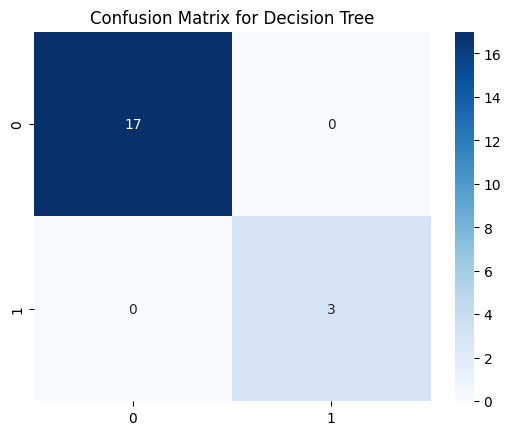


ROC AUC Score for Decision Tree: 1.00


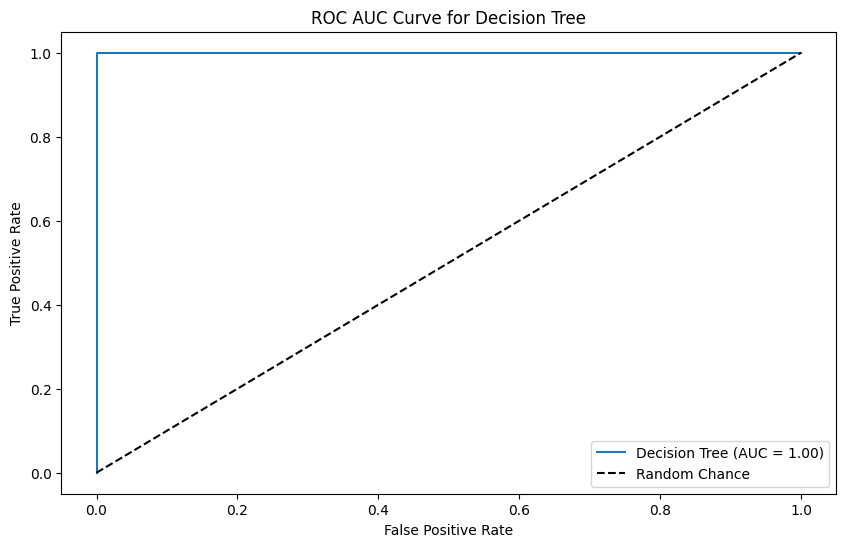


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


ROC AUC Score for Random Forest: 1.00


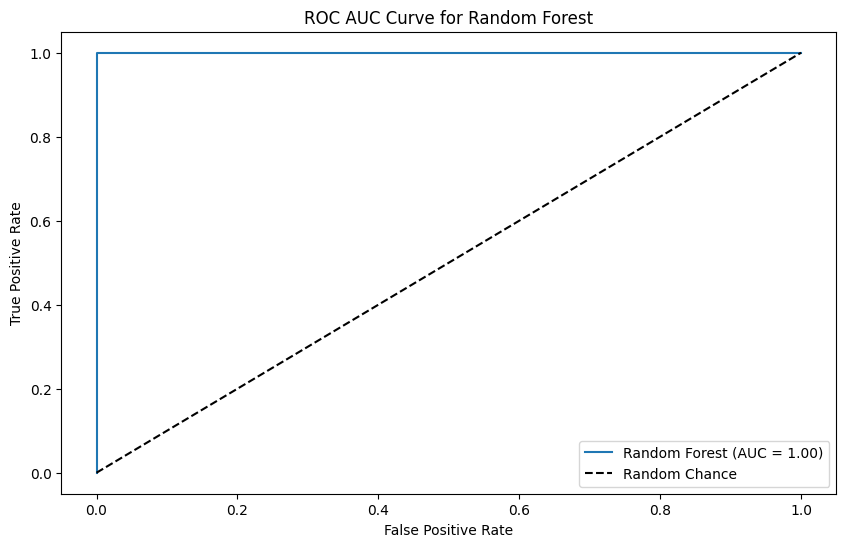

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Decision Tree Evaluation
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, predictions))

conf_matrix_dt = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

roc_auc_dt = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score for Decision Tree: {roc_auc_dt:.2f}")

fpr_dt, tpr_dt, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Random Forest Evaluation
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))

conf_matrix_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

roc_auc_rf = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score for Random Forest: {roc_auc_rf:.2f}")

fpr_rf, tpr_rf, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()
